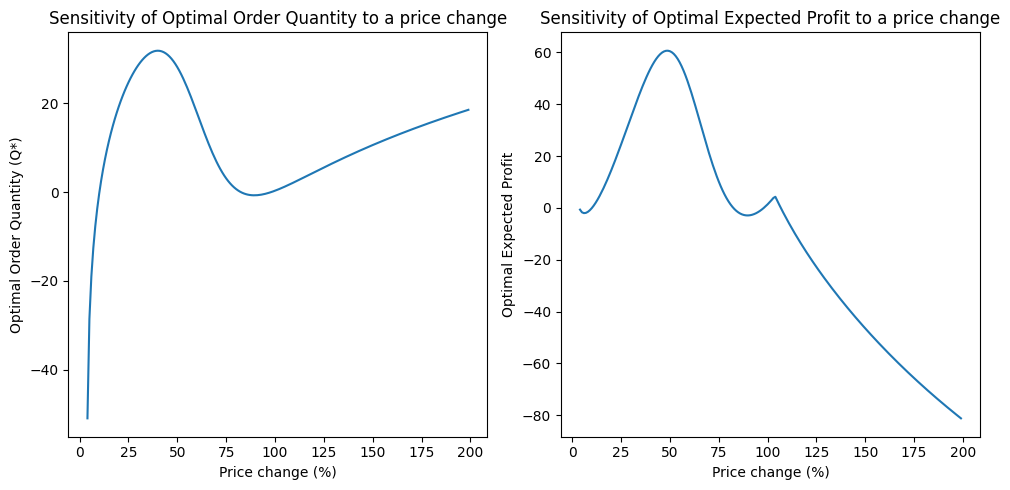

In [37]:
import numpy as np
import plotly.express as px
from scipy.stats import norm
import matplotlib.pyplot as plt

def priceDemandFunc(delta_price):
    return ( 1 / ( 1 + np.exp(6-delta_price/10) ) - 0.0025 )

def calculateOptimalOrderQuantity(p,p_L,c,c_s,stdevDemand, meanDemand):
    overage_cost = p - c
    underage_cost = c + c_s - p_L
    quantile = overage_cost / ( overage_cost + underage_cost)
    optimalQuantity = norm.ppf(quantile, loc=meanDemand, scale=stdevDemand)
    return optimalQuantity

def calculateOptimalProfit(p,p_L,c,c_s,Q_star, meanDemand):
    s = Q_star - meanDemand
    profit = -Q_star * c - max(0,s) * c_s + min(Q_star, meanDemand) * p + max(0,s) * p_L
    return profit

cost_increase = 1.25

stdevDemand = 42.255709
meanDemand = 66.527485

cost = 3.85 * cost_increase
price = 4.64
priceLow = 0.15
shippingCost = 0.11 * cost_increase

optimalOrderQuantity = calculateOptimalOrderQuantity(price,priceLow,cost,shippingCost,stdevDemand,meanDemand)
# Optimal order quantity vs shipping expenses
price_values_change = np.arange(0, 2, 0.01)  # Adjust the range as needed

# Lists to store the results
optimal_quantity = []
optimal_profit = []

# Calculate Q* and optimal profit for each cS value
for price_change in price_values_change:
    current_price = (1+price_change) * price
    current_priceLow = (1+price_change) * priceLow
    #demand = meanDemand / (1 + (priceDemandFunc(price_change * 100)))
    demand = meanDemand * (1 - (priceDemandFunc(price_change * 100)))
    Q_star = calculateOptimalOrderQuantity( current_price, current_priceLow, cost, shippingCost, stdevDemand, demand)
    optimal_quantity.append(Q_star)
    profit = calculateOptimalProfit(current_price, current_priceLow, cost, shippingCost, Q_star, demand)
    optimal_profit.append(profit)

# Plotting the sensitivity graphs
plt.figure(figsize=(10, 5))

# Sensitivity graph for Q*
plt.subplot(1, 2, 1)
plt.plot(price_values_change*100, optimal_quantity)
plt.xlabel('Price change (%)')
plt.ylabel('Optimal Order Quantity (Q*)')
plt.title('Sensitivity of Optimal Order Quantity to a price change')

# Sensitivity graph for optimal profit
plt.subplot(1, 2, 2)
plt.plot(price_values_change*100, optimal_profit)
plt.xlabel('Price change (%)')
plt.ylabel('Optimal Expected Profit')
plt.title('Sensitivity of Optimal Expected Profit to a price change')

# Display the plots
plt.tight_layout()
plt.show()

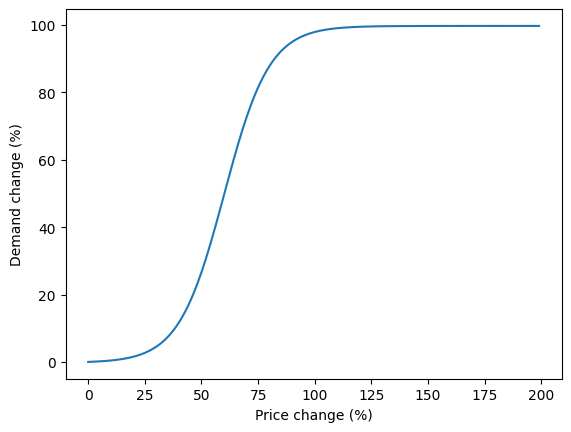

In [36]:
x = price_values_change
y = priceDemandFunc(price_values_change * 100) * 100
plt.plot(x*100,y)
plt.xlabel('Price change (%)')
plt.ylabel('Demand change (%)')
plt.show()